<a href="https://colab.research.google.com/github/AndersonSMed/leetcode-hero/blob/master/dynamic-programming/dynamic-programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programação Dinâmica

Programação dinâmica pode ser descrita como recursão com o apoio de uma tabela. Mais precisamente, ao invés de resolver os subproblemas recursivamente, esses subproblemas são resolvidos sequencialmente e as suas soluções são armazenadas em uma tabela.

O truque para esse tipo de resolução é resolver os problemas na ordem certa, assim, sempre que você precisar de uma solução para um subproblema, ele já estará disponível na tabela.

A utilidade da programação dinâmica é em problemas que a divisão e conquista produz um número exponencial de subproblemas e na verdade o que ocorre é a repetição de um pequeno número de subproblemas com frequência. Logo, nessas situações, calcula-se cada solução na primeira vez e as armazena em uma tabela para uso futuro, em vez sempre recalcular as soluções recursivamente quando for necessário.

Enquanto a divisão e conquista é top-down, a programação dinâmica é bottom-up. Em resumo, com PD resolve-se os problemas de pequena
dimensão e guarda-se as soluções. A solução de um problema é
obtida combinando as de problemas de menor dimensão. 

-----------------------

Para exemplificar, vamos a um exemplo básico:

In [0]:
def fibonacci (numero):
    
    if numero <= 1:
        return numero
    else:
        return fibonacci(numero - 1) + fibonacci(numero - 2)

Acima nós temos uma implementação clássica do algoritmo de fibonacci, onde você calcula o fibonacci de um número através do fibonacci dos dois números anteriores a ele. Agora vamos a uma implementação com programação dinâmica.

In [0]:
def fibonacci_pd (numero):

    # Aqui nós definimos nossa estrutura, que trabalhará como uma "memória" com o fibonacci dos números já computados
    fib = [0, 1]

    for temp_num in range(2, numero + 1):
        
        fib.append(fib[temp_num - 1] + fib[temp_num - 2])

    return fib[numero]

Agora vamos medir o tempo em que cada uma de nossas funções demora para calcular o fibonacci do número 40

In [0]:
import time

start_time = time.clock()
fibonacci(40)
print("{} segundos".format(time.clock() - start_time))

35.759142999999995 segundos


In [0]:
start_time = time.clock()
fibonacci_pd(40)
print("{} segundos".format(time.clock() - start_time))

0.00013999999987390765 segundos


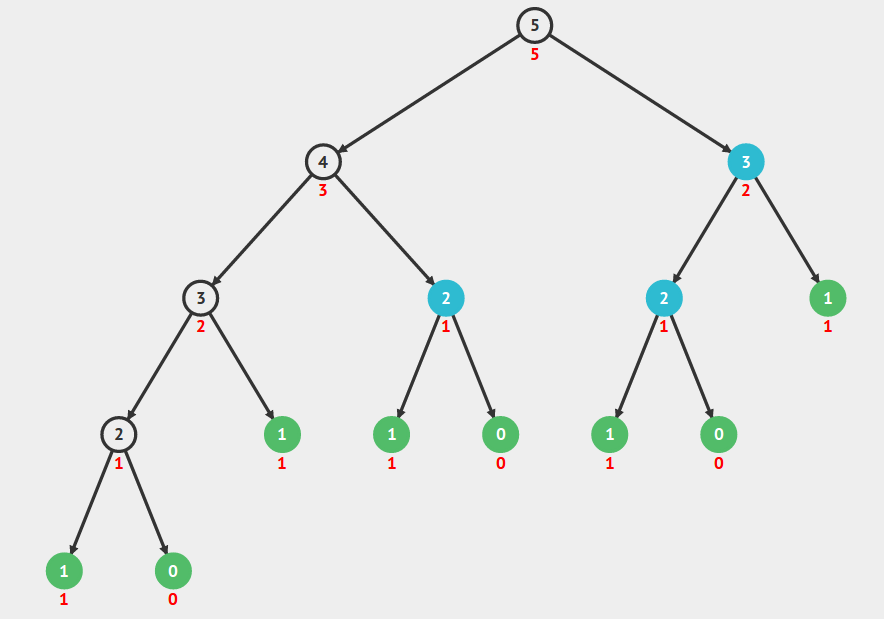

Como podemos ver na imagem acima, o que acontece é que, no primeiro exemplo, vários números tem o seu fibonacci calculado repetidamente (veja o caso do número 2 e 3), e o que a programação dinâmica nos entrega é uma forma de armazenar esses dados, afim de melhorar a complexidade assintótica de nosso algoritmo.

--------------------

##Exemplos

Agora vamos aos exemplos, começando pela questão 303 do LeetCode, que pode ser encontrada no link a seguir:
- https://leetcode.com/problems/range-sum-query-immutable/

303. Dado um array de números inteiros, encontre a soma dos elementos entre os índices i e j (i ≤ j), de forma inclusiva.

In [0]:
class NumArray:

    _sum_list = None
    
    def __init__(self, nums: List[int]):
        
        self._sum_list = list()
        
        for index in range(len(nums) + 1):
            num = nums[index - 1] if index > 0 else 0
            
            if index >= 1:
                self._sum_list.append(self._sum_list[index - 1] + num)
            else:
                self._sum_list.append(num)
            

    def sumRange(self, i: int, j: int) -> int:
        
        return self._sum_list[j + 1] - self._sum_list[i]


O problema dessa questão está no fato que o método sumRange será chamado várias vezes, fazendo com que seja necessário recalcular a soma entre as posições várias vezes, de tal forma que a complexidade assintótica depende da quantidade de vezes que o método sumRange é chamado. Exemplificando:
- Caso o método seja chamado n vezes, sendo n o tamanho do array de nums, a complexidade desse problema seria de O(n * n), no pior caso.

Para contornar esse problema, nós fazemos um processamento inicial, calculando a soma de todas as posições em relação aos seus anteriores, totalizando assim uma complexidade assintótica de O(n).

Esse procedimento é necessário para criar uma "memória" das somas, de tal forma que, quando seja necessário calcular a soma entre as posições i e j, esse cálculo seja realizado de forma constante, ou seja, em O(1).

------------

Partindo agora para resolução de problemas mais complexos, vamos resolver a questão 62, que pode ser encontrada no link a seguir:
- https://leetcode.com/problems/unique-paths/

62. Um robô está localizado no canto superior esquerdo de uma matriz m x n. Ele só pode se mover ou para baixo ou para direita. O robô está tentando chegar ao canto inferiror direito da matriz. Nós devemos calcular a quantidade de caminhos únicos que o robô pode tomar.


In [0]:
class Solution:

    def uniquePaths(self, m: int, n: int) -> int:
        # Iniciamos os caminhos possíveis com 1, pois em uma matriz de 1 x 1, o robô só possui um caminho a tomar
        possible_paths = [[1 for col in range(m)] for row in range(n)]
        
        for a in range(1, n):
            for b in range(1, m):
                possible_paths[a][b] = possible_paths[a - 1][b] + possible_paths[a][b - 1]
                
        return possible_paths[n - 1][m - 1]

Esse problema pode ser considerado como um exemplo clássico do uso de programação dinâmica, uma vez que, pensando na forma recursiva, nós temos que a quantidade de caminhos que o robô pode tomar é igual a quantidade de caminhos tanto a esquerda quanto acima, uma vez que estamos falando de uma matriz em 2D. O que poderia nos levar a seguinte resolução:

In [0]:
def caminhosUnicos(m, n):
    if m == 1 and n == 1:
        return 1
    if m == 0 or n == 0:
        return 0
    return caminhosUnicos(m - 1, n) + caminhosUnicos(m, n - 1)

Porém, como nós já vimos, essa resolução nos leva ao problema do re-processamento desnecessário, de tal forma que certos elementos no espaço serão recalculados várias vezes, liderando a uma complexidade exponencial.

Para tal, nós chegamos ao código mostrado na primeira célula, onde usamos uma matriz para armazenar os possíveis caminhos, seguindo de forma iterativa até termos preenchido toda a matriz com os possíveis caminhos, diminuindo a complexidade assintótica do problema de exponencial para O(n * m).

--------------------

Caso tenha interesse, a seguir nós listamos a resolução do problema 123, que é um problema do nível difícil e que usa programação dinâmica, seguem os links para o problema a para a resolução, respectivamente:
- https://leetcode.com/problems/best-time-to-buy-and-sell-stock-iii/description/
- https://leetcode.com/playground/TVPEFDu8
- OBS: A resolução foi implementada em C++, então se segure bem na cadeira antes de abrir esse link hahaha.

---------

## Colaboradores

* <a href="https://github.com/andrewinston/">André Winston</a> 
* <a href="https://github.com/camiladuartes/">Camila Duarte</a>
* <a href="https://github.com/andersonsmed/">Anderson Medeiros</a>

